IMPORTING LIBRARIES

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Additional Libraries for handling warnings
import warnings
warnings.filterwarnings("ignore")


IMPORT DATASET

In [ ]:
import kagglehub
import os
import shutil
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")
custom_path="/content/dataset"
os.makedirs(custom_path,exist_ok=True)
shutil.move(path,custom_path)
print("Path to dataset files:", custom_path)


100%|██████████| 21.4M/21.4M [00:00<00:00, 73.3MB/s]

Extracting files...


Path to dataset files: /content/dataset


In [ ]:
df=pd.read_csv('/content/dataset/6/2020/heart_2020_cleaned.csv',nrows=100000)

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      100000 non-null  object 
 1   BMI               100000 non-null  float64
 2   Smoking           100000 non-null  object 
 3   AlcoholDrinking   100000 non-null  object 
 4   Stroke            100000 non-null  object 
 5   PhysicalHealth    100000 non-null  float64
 6   MentalHealth      100000 non-null  float64
 7   DiffWalking       100000 non-null  object 
 8   Sex               100000 non-null  object 
 9   AgeCategory       100000 non-null  object 
 10  Race              100000 non-null  object 
 11  Diabetic          100000 non-null  object 
 12  PhysicalActivity  100000 non-null  object 
 13  GenHealth         100000 non-null  object 
 14  SleepTime         100000 non-null  float64
 15  Asthma            100000 non-null  object 
 16  KidneyDisease     100

In [ ]:
bmi_min = df['BMI'].min()
bmi_max = df['BMI'].max()
bmi_max


87.05

PREPROCESSING

In [ ]:
#binning
mappings = {
    'HeartDisease': {'No': 0, 'Yes': 1},
    'Smoking': {'No': 0, 'Yes': 1},
    'AlcoholDrinking': {'No': 0, 'Yes': 1},
    'Stroke': {'No': 0, 'Yes': 1},
    'DiffWalking': {'No': 0, 'Yes': 1},
    'Sex': {'Male': 0, 'Female': 1},
    'AgeCategory': {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5,
                    '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12},
    'Diabetic': {'No': 0, 'Yes': 1, 'No, borderline diabetes': 2,'Yes (during pregnancy)':3},
    'PhysicalActivity': {'No': 0, 'Yes': 1},
    'GenHealth': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4},
    'Asthma': {'No': 0, 'Yes': 1},
    'KidneyDisease': {'No': 0, 'Yes': 1}
}
for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,White,1,1,3,5.0,1,0,Yes
1,0,20.34,0,0,1,0.0,0.0,0,1,12,White,0,1,3,7.0,0,0,No
2,0,26.58,1,0,0,20.0,30.0,0,0,9,White,1,1,1,8.0,1,0,No
3,0,24.21,0,0,0,0.0,0.0,0,1,11,White,0,0,2,6.0,0,0,Yes
4,0,23.71,0,0,0,28.0,0.0,1,1,4,White,0,1,3,8.0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,31.09,1,0,0,30.0,15.0,0,1,5,White,0,1,3,6.0,0,0,No
99996,0,29.53,0,0,0,0.0,0.0,0,0,3,White,0,1,3,7.0,0,0,No
99997,0,38.65,0,0,0,0.0,0.0,0,0,1,White,0,0,4,7.0,0,0,No
99998,0,50.84,1,0,1,30.0,0.0,1,1,6,White,0,0,0,4.0,0,0,No


In [ ]:
df.drop('Race', axis=1, inplace=True)
df.drop('SkinCancer', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
cols=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease']
# Convert all columns to categorical data type
for col in cols:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      100000 non-null  category
 1   BMI               100000 non-null  float64 
 2   Smoking           100000 non-null  category
 3   AlcoholDrinking   100000 non-null  category
 4   Stroke            100000 non-null  category
 5   PhysicalHealth    100000 non-null  float64 
 6   MentalHealth      100000 non-null  float64 
 7   DiffWalking       100000 non-null  category
 8   Sex               100000 non-null  category
 9   AgeCategory       100000 non-null  category
 10  Diabetic          100000 non-null  category
 11  PhysicalActivity  100000 non-null  category
 12  GenHealth         100000 non-null  category
 13  SleepTime         100000 non-null  float64 
 14  Asthma            100000 non-null  category
 15  KidneyDisease     100000 non-null  category
dtypes: 

In [ ]:
df.shape

(100000, 16)

In [ ]:
df.duplicated().sum()

3524

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(96476, 16)

EDA

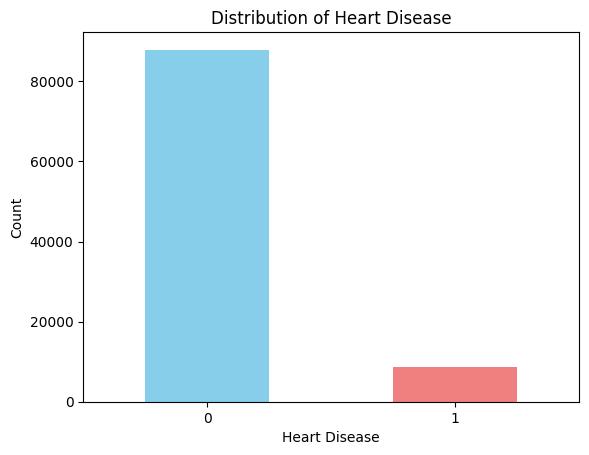

In [ ]:
heart_disease_counts = df['HeartDisease'].value_counts()
heart_disease_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


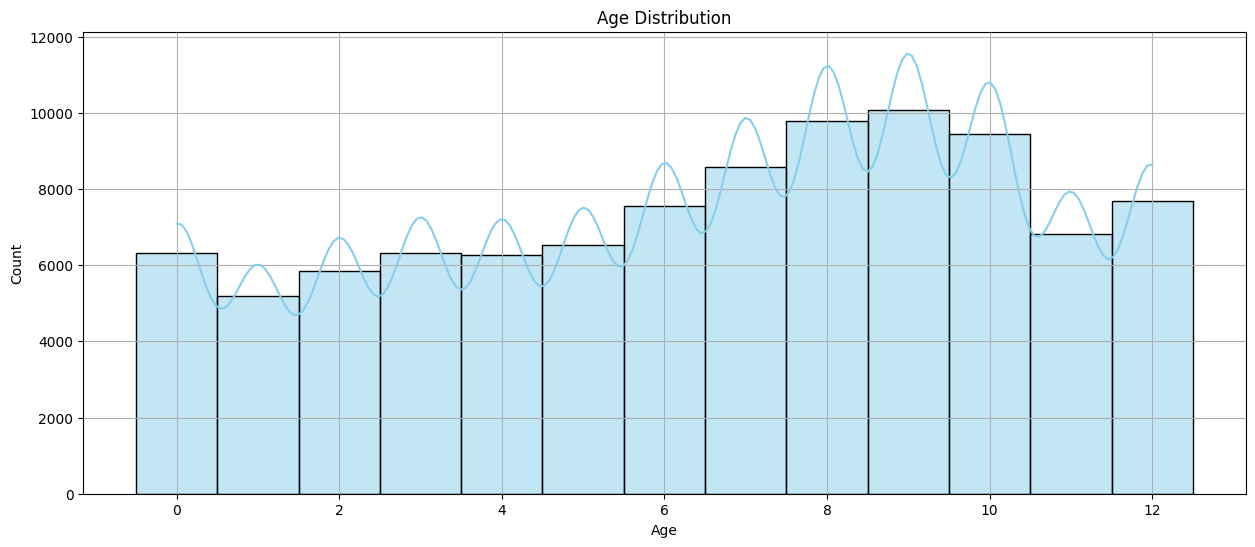

In [ ]:
df = df.sort_values(by='AgeCategory')
plt.figure(figsize=(15, 6))
sns.histplot(df['AgeCategory'], bins=5, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

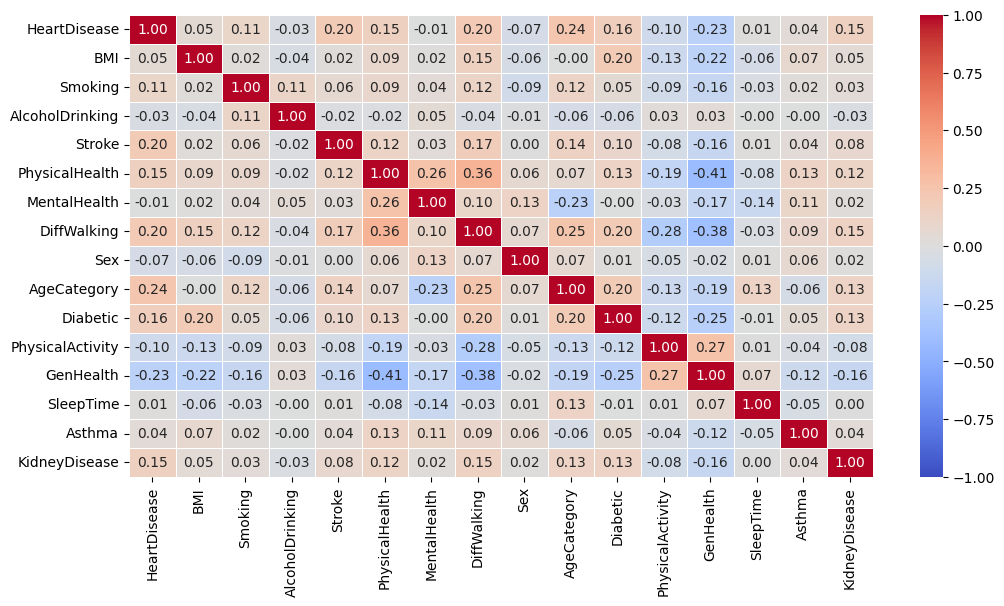

In [ ]:
spearman_corr = df.corr(method='spearman')
plt.figure(figsize=(12,6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.show()

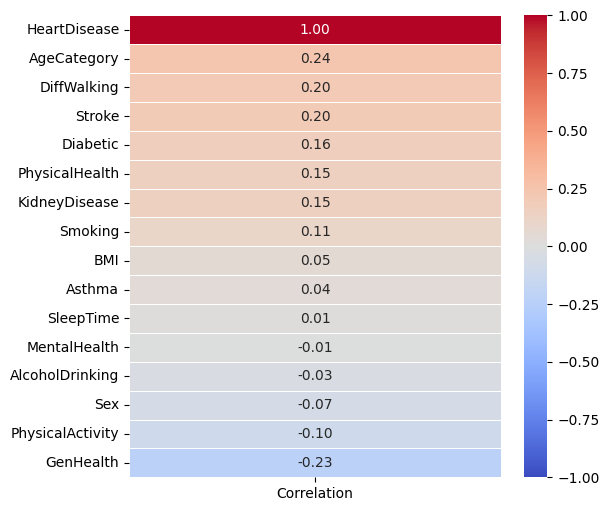

In [ ]:
corr1 = df.corr(method='spearman')['HeartDisease']
corr1 = pd.DataFrame(corr1)
corr1.columns = ['Correlation']
corr1_sorted = corr1.sort_values(by='Correlation', ascending=False)
plt.figure(figsize=(6, 6))
sns.heatmap(corr1_sorted, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.show()

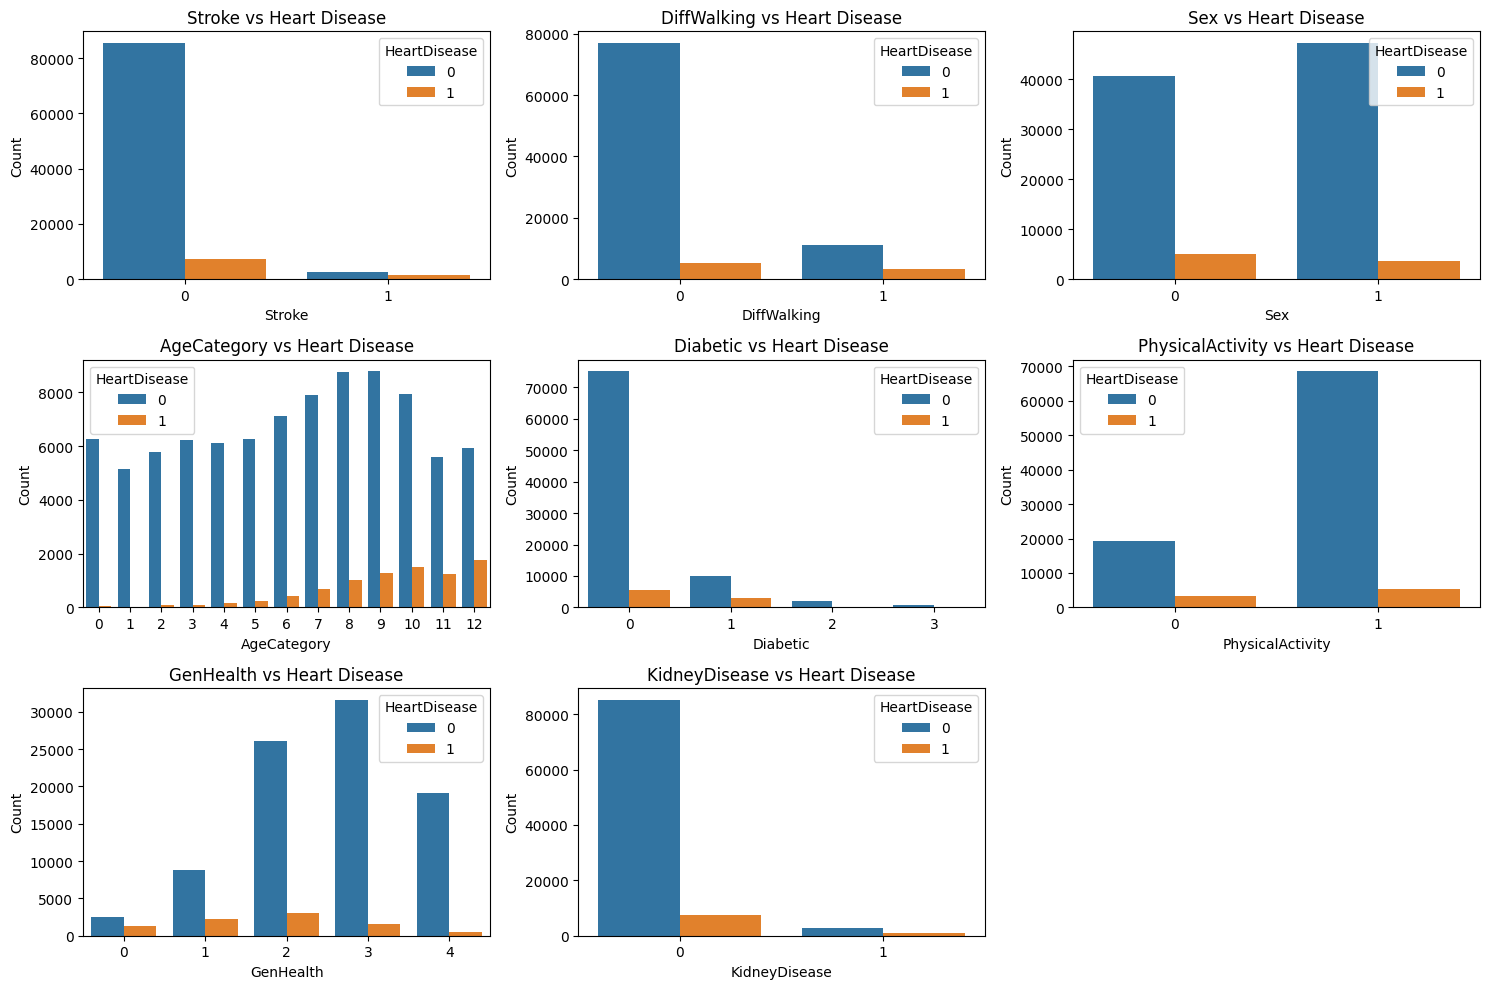

In [ ]:
plt.figure(figsize=(15, 10))

columns_to_plot = ['Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'KidneyDisease']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='HeartDisease')
    plt.title(f'{col} vs Heart Disease')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


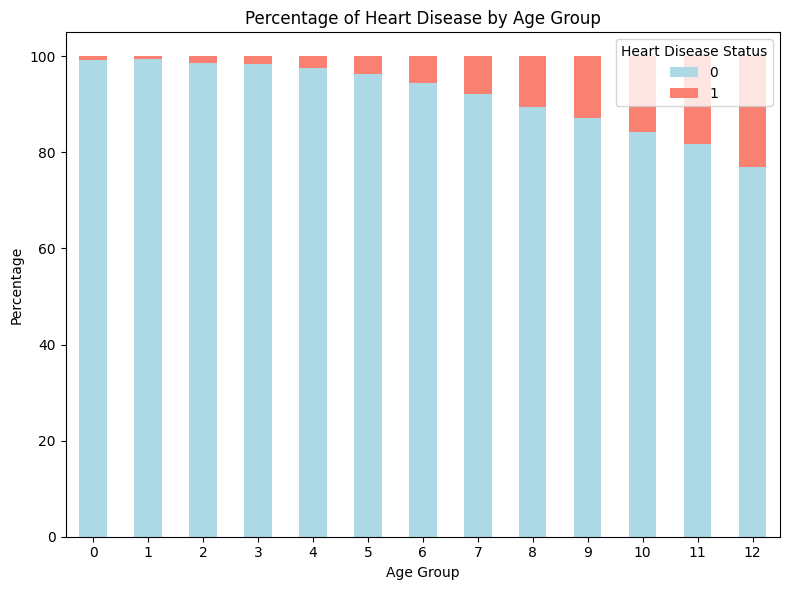

In [ ]:
# Calculate percentage of heart disease for each age group
age_group_percentage = df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize=True).unstack()
age_group_percentage = age_group_percentage * 100
age_group_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'salmon'])
plt.title('Percentage of Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop('HeartDisease', axis=1)  # Features
y = df['HeartDisease']  # Target

In [ ]:
y.value_counts()

,count
HeartDisease,
0,87910
1,8566


# **Balancing the dataset**

In [ ]:
from imblearn.over_sampling import SMOTE
# SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

**HANDLING MISSING VALUES**

In [ ]:
print("Missing values before filling:")
print(X_resampled.isnull().sum())
X_resampled.fillna(method='ffill', inplace=True)
X_resampled.fillna(method='bfill', inplace=True)

print("\nMissing values after filling with forward-fill and backward-fill:")
print(X_resampled.isnull().sum())


Missing values before filling:
BMI                     0
Smoking             23202
AlcoholDrinking      4902
Stroke              15461
PhysicalHealth          0
MentalHealth            0
DiffWalking         18740
Sex                 23487
AgeCategory         37951
Diabetic            23339
PhysicalActivity    22157
GenHealth           33111
SleepTime               0
Asthma              16543
KidneyDisease       12722
dtype: int64

Missing values after filling with forward-fill and backward-fill:
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

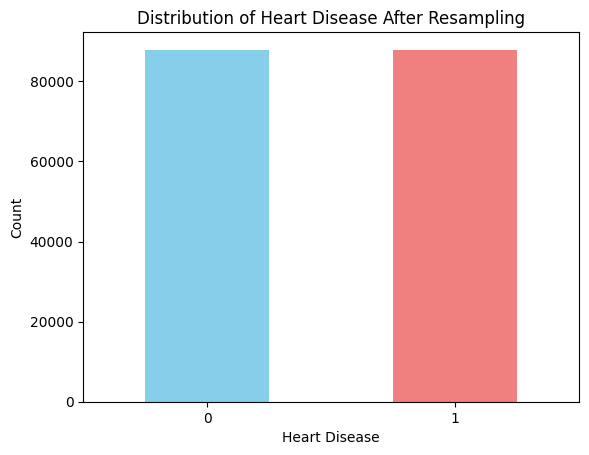

After resampling - No Heart Disease: 87910, Heart Disease: 87910


In [ ]:
df_resampled = X_resampled.copy()
df_resampled['HeartDisease'] = y_resampled
heart_disease_counts_resampled = df_resampled['HeartDisease'].value_counts()
heart_disease_counts_resampled.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Disease After Resampling')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print(f"After resampling - No Heart Disease: {heart_disease_counts_resampled[0]}, Heart Disease: {heart_disease_counts_resampled[1]}")

In [ ]:
df_resampled.isnull().sum()

,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0
Diabetic,0


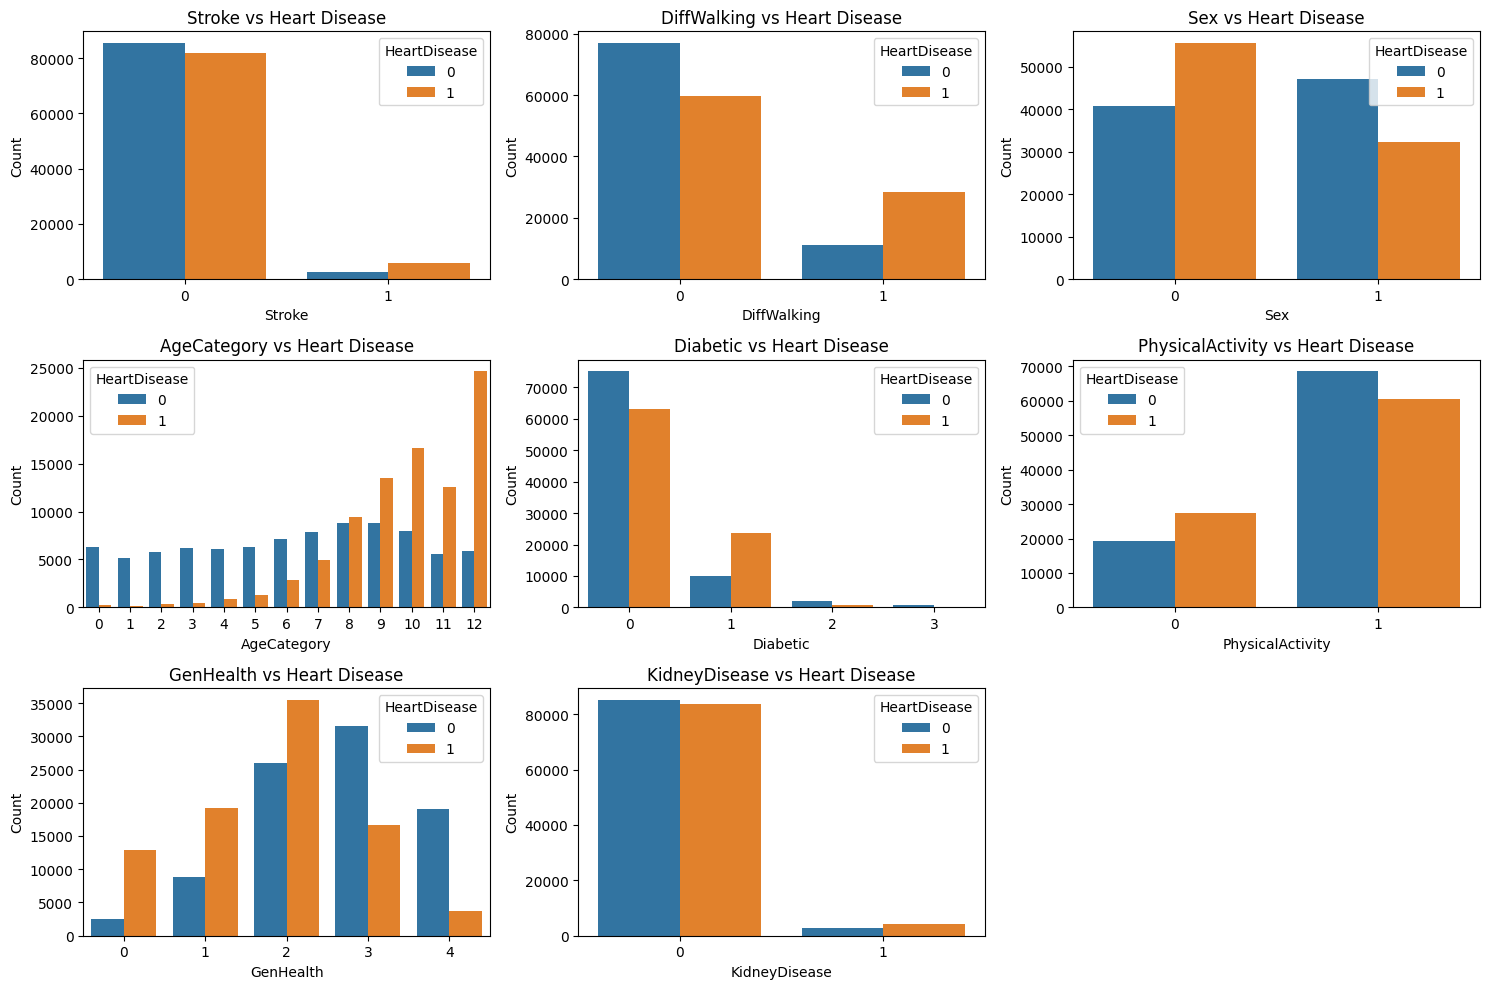

In [ ]:
plt.figure(figsize=(15, 10))

columns_to_plot = ['Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'KidneyDisease']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_resampled, x=col, hue='HeartDisease')
    plt.title(f'{col} vs Heart Disease')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


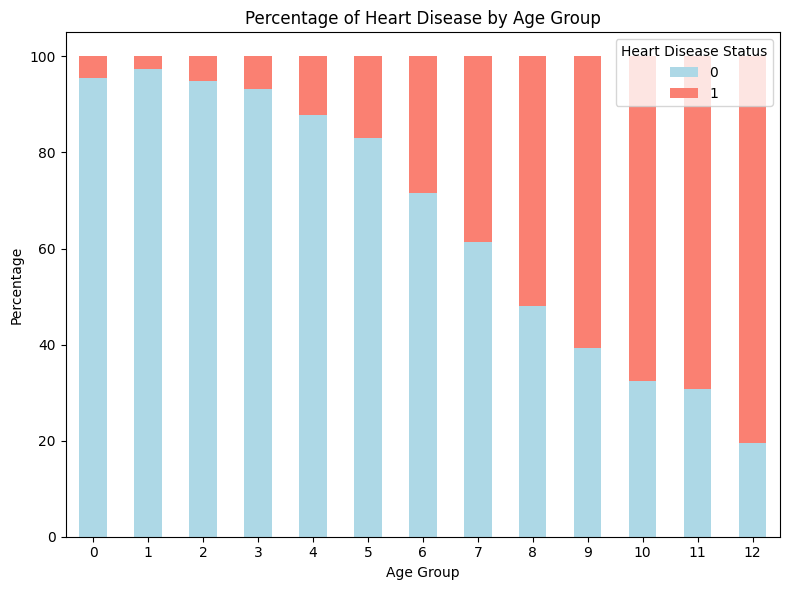

In [ ]:
age_group_percentage = df_resampled.groupby('AgeCategory')['HeartDisease'].value_counts(normalize=True).unstack()
age_group_percentage = age_group_percentage * 100
age_group_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'salmon'])
plt.title('Percentage of Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **RANDOM FOREST CLASSIFIER**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rf * 100:.2f}%')

Accuracy: 85.31%


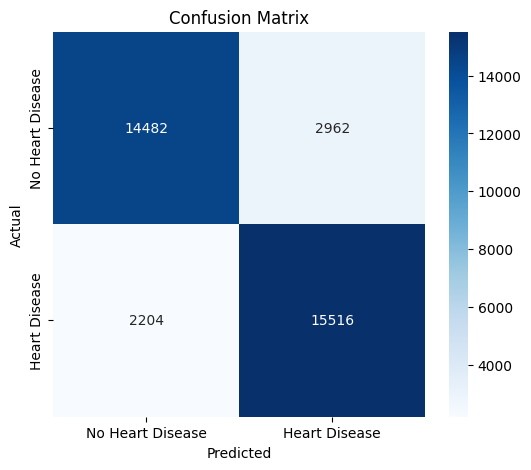

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     17444
           1       0.84      0.88      0.86     17720

    accuracy                           0.85     35164
   macro avg       0.85      0.85      0.85     35164
weighted avg       0.85      0.85      0.85     35164



In [ ]:
importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
             Feature  Importance
0                BMI    0.246434
8        AgeCategory    0.237859
12         SleepTime    0.120559
11         GenHealth    0.097887
4     PhysicalHealth    0.077899
5       MentalHealth    0.054321
7                Sex    0.029491
1            Smoking    0.028021
9           Diabetic    0.024370
6        DiffWalking    0.024118
2    AlcoholDrinking    0.016144
10  PhysicalActivity    0.014625
13            Asthma    0.012129
3             Stroke    0.008924
14     KidneyDisease    0.007219


Average Precision Score: 0.9208


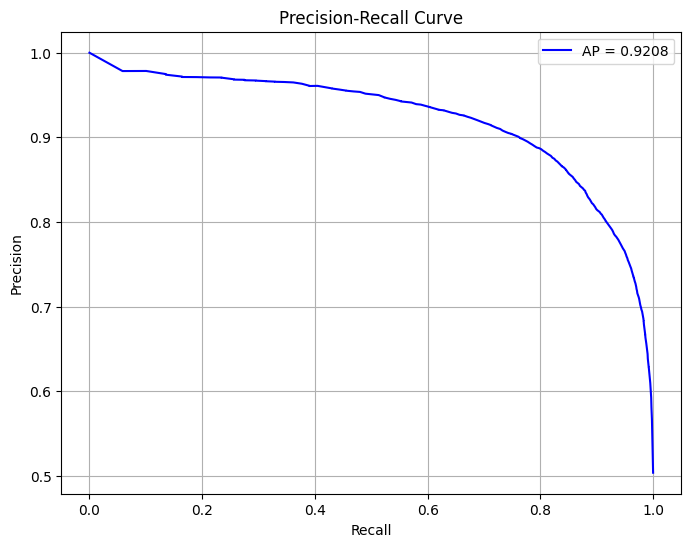

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

y_scores = rf_classifier.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

average_precision = average_precision_score(y_test, y_scores)
print(f"Average Precision Score: {average_precision:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision:.4f}', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_knn * 100:.2f}%')

Accuracy: 80.35%


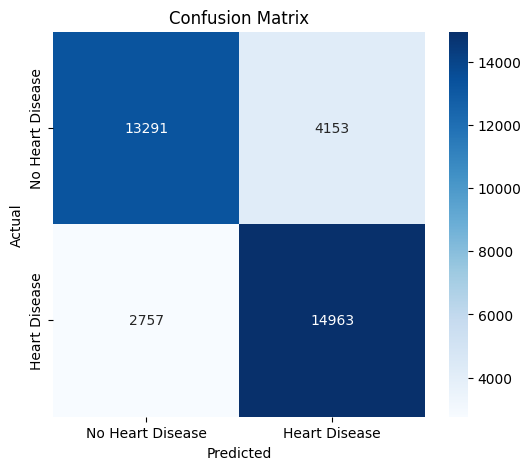

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     17444
           1       0.78      0.84      0.81     17720

    accuracy                           0.80     35164
   macro avg       0.81      0.80      0.80     35164
weighted avg       0.81      0.80      0.80     35164



Average Precision Score: 0.8262


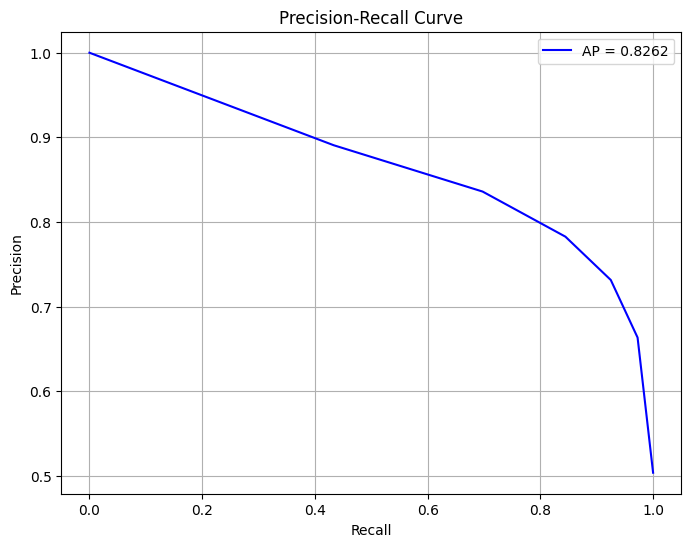

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

y_scores = knn_classifier.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

average_precision = average_precision_score(y_test, y_scores)
print(f"Average Precision Score: {average_precision:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision:.4f}', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(penalty='l2', C=0.1, max_iter=2000, random_state=42)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=2000, random_state=42)

In [ ]:
y_pred=lr.predict(X_test)
accuracy_lr=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy_lr * 100:.2f}%')

Accuracy: 78.84%


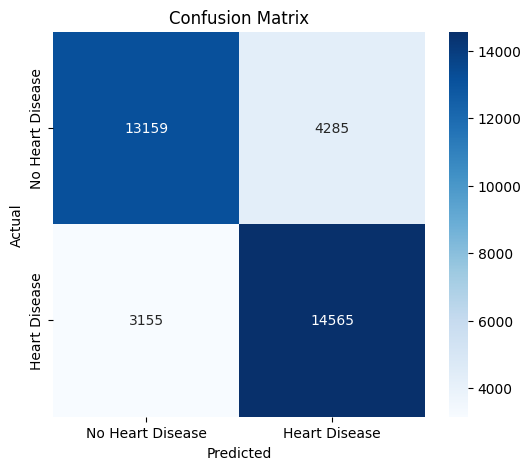

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78     17444
           1       0.77      0.82      0.80     17720

    accuracy                           0.79     35164
   macro avg       0.79      0.79      0.79     35164
weighted avg       0.79      0.79      0.79     35164



Average Precision Score: 0.8462


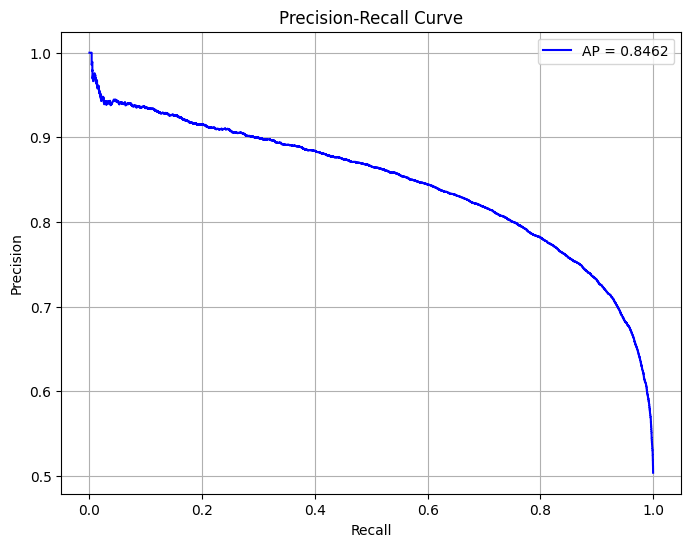

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

y_scores = lr.predict_proba(X_test)[:, 1]

#precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

#Average Precision (AP) score
average_precision = average_precision_score(y_test, y_scores)
print(f"Average Precision Score: {average_precision:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision:.4f}', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


# **COMPARISON**

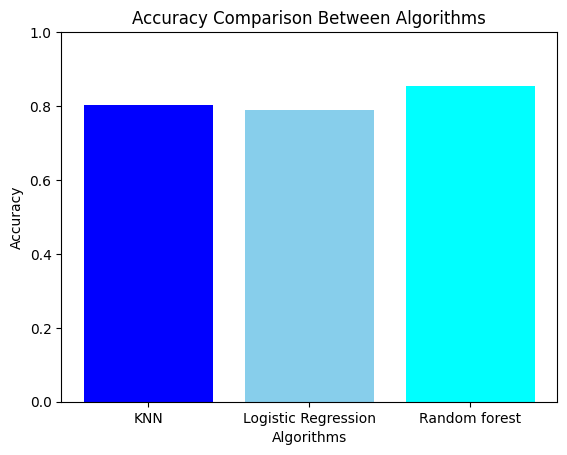

In [ ]:
algos = ['KNN', 'Logistic Regression', 'Random forest']
accuracies = [accuracy_knn, accuracy_lr, accuracy_rf]

plt.bar(algos, accuracies, color=['blue', 'skyblue', 'aqua'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Between Algorithms')
plt.ylim(0, 1)
plt.show()